In [423]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
cityride_df = pd.merge(ride_data, city_data, on='city')

# Display the data table for preview
cityride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [424]:
# Separate into 3 different groups: 1 = Urban
urban = cityride_df.groupby(['type']).get_group('Urban')
urban.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [425]:
# Average Urban Fare per City
urban_cityfares = urban['fare'].groupby(urban['city'])
avg_urban_cityfares = urban_cityfares.mean()
avg_urban_cityfares.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [426]:
# Total Urban Fares
urban_fares = urban['fare'].sum()
urban_fares

39854.38

In [427]:
#Number of Urban Rides by Type
urban_rides = urban.count()
urban_rides
num_urban_rides = urban_rides[0]
num_urban_rides

1625

In [428]:
#Number of Urban Rides Per City
urban_cityrides = urban.groupby(['city'])
num_urban_cityrides = urban_cityrides['ride_id'].count()
num_urban_cityrides.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [429]:
urban_cities = urban.groupby('city').count()
urban_cities['ride_id'].head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [430]:
# Number of Urban Drivers Per City
urban_city_drivers = urban_cityrides['driver_count'].mean()
num_urban_city_drivers = urban_city_drivers.head()
num_urban_city_drivers

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [431]:
num_urban_drivers = urban_city_drivers.sum()
num_urban_drivers

2405

In [432]:
# Separate into 3 different groups: 2 = Suburban
suburban = cityride_df.groupby(['type']).get_group('Suburban')
suburban.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,Barronchester,2018-05-05 04:03:11,30.38,2281522828169,11,Suburban
1627,Barronchester,2018-04-25 19:11:43,36.13,2660177707065,11,Suburban
1628,Barronchester,2018-03-31 06:05:30,44.24,1252888806772,11,Suburban
1629,Barronchester,2018-03-02 23:36:58,36.49,4031573980778,11,Suburban


In [433]:
suburban_cityfares = suburban['fare'].groupby(suburban['city'])
avg_suburban_cityfares = suburban_cityfares.mean()
avg_suburban_cityfares.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [434]:
# Total Suburban Fares
suburban_fares = suburban['fare'].sum()
suburban_fares

19356.33

In [435]:
# Number of Suburban Rides by Type
suburban_rides = suburban.count()
suburban_rides
num_suburban_rides = suburban_rides[0]
num_suburban_rides

625

In [436]:
#Number of Suburban Rides Per City
suburban_cityrides = suburban.groupby('city')
num_suburban_cityrides = suburban_cityrides['ride_id'].count()
num_suburban_cityrides.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [437]:
# Number of Suburban Drivers Per City
suburban_city_drivers = suburban_cityrides['driver_count'].mean()
num_suburban_city_drivers = suburban_city_drivers.head()
num_suburban_city_drivers

city
Barronchester    11
Bethanyland      22
Brandonfort      10
Colemanland      23
Davidfurt        23
Name: driver_count, dtype: int64

In [438]:
num_suburban_drivers = suburban_city_drivers.sum()
num_suburban_drivers

490

In [439]:
# Separate into 3 different groups: 3 = Rural
rural = cityride_df.groupby(['type']).get_group('Rural')
rural.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,Randallchester,2018-02-19 03:52:47,58.55,8004803682564,9,Rural
2252,Randallchester,2018-02-11 05:42:29,25.78,9010611749008,9,Rural
2253,Randallchester,2018-03-25 13:36:46,10.37,3216382725494,9,Rural
2254,Randallchester,2018-04-07 23:42:07,10.79,1615474447641,9,Rural


In [440]:
rural_cityfares = rural['fare'].groupby(rural['city'])
avg_rural_cityfares = rural_cityfares.mean()
avg_rural_cityfares.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [441]:
# Total Urban Fares
rural_fares = rural['fare'].sum()
rural_fares

4327.929999999999

In [442]:
#Number of Rural Rides by Type
rural_rides = rural.count()
num_rural_rides = rural_rides[0]
num_rural_rides

125

In [444]:
#Number of Rural Rides per city
rural_cityrides = rural.groupby('city')
num_rural_cityrides = rural_cityrides['ride_id'].count()
num_rural_cityrides.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [447]:
# Number of Rural Drivers Per City
rural_city_drivers = rural_cityrides['driver_count'].mean()
num_rural_city_drivers = rural_city_drivers
num_rural_city_drivers

city
Bradshawfurt         7
Garzaport            7
Harringtonfort       4
Jessicaport          1
Lake Jamie           4
Lake Latoyabury      2
Michaelberg          6
New Ryantown         2
Newtonview           1
North Holly          8
North Jaime          1
Penaborough          6
Randallchester       9
South Jennifer       7
South Marychester    1
South Saramouth      7
Taylorhaven          1
West Heather         4
Name: driver_count, dtype: int64

In [448]:
num_rural_drivers = rural_city_drivers.sum()
num_rural_drivers

78

## Bubble Plot of Ride Sharing Data

In [449]:
# Obtain the x and y coordinates for each of the three city types
x_limit = cityride_df['city'].value_counts().max()
x_limit
x_axis = np.arange(0, 45, 1)
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [450]:
# Obtain the y coordinates for each of the three city types
y_limit = cityride_df['fare'].groupby(cityride_df['city']).mean().max()
y_limit
y_axis = np.arange(0, y_limit, 1)
y_axis

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43.])

In [452]:
# Obtain the y-values=avg_fare for each city
avg_cityfare = cityride_df['fare'].groupby(cityride_df['city']).mean()
avg_cityfare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [453]:
num_cityrides = cityride_df['date'].groupby(cityride_df['city']).count()
num_cityrides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: date, dtype: int64

In [454]:
num_citydrivers = cityride_df['driver_count'].groupby(cityride_df['city']).mean()
total_drivers = num_citydrivers.sum()
total_drivers

2973

In [455]:
# Create list of types
city_type = cityride_df['type'].value_counts()
city_types = city_type.keys()
type_list = list(city_types)
print(f"city_types are : {city_types}.")
print(f"type_list is : {type_list}.")

city_types are : Index(['Urban', 'Suburban', 'Rural'], dtype='object').
type_list is : ['Urban', 'Suburban', 'Rural'].


In [456]:
num_urban_rides

1625

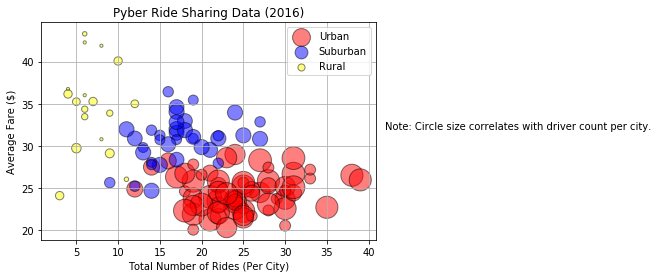

In [460]:

# Create a random array of data that we will use for our y values
#data = [random.random() for value in x_axis]
num_cityrides_legend = [avg_urban_cityfares, avg_suburban_cityfares, avg_rural_cityfares]
facecolors = ['red', 'blue', 'yellow']
citytype = type_list
# Build the scatter plots for each city types
#try:
#    plt.scatter(num_rides, avg_urban_cityfares, marker="o", facecolors='red', edgecolors="black",
#            s=num_urban_drivers, alpha=0.75)
#except AttributeError:
#    print("An AttributeError happened. Ignore it.")
#except ValueError:
#    print("A ValueError happened. Ignore it, too")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


#plt.xlim(0,x_axis)
#plt.ylim(0,y_axis)

# Create a legend
plt.scatter(num_urban_cityrides, avg_urban_cityfares, color="red", edgecolors="black", label="Urban", s=10*num_urban_city_drivers, alpha=0.50)
plt.scatter(num_suburban_cityrides, avg_suburban_cityfares, color="blue", edgecolors="black", label="Suburban", s=10*num_suburban_city_drivers, alpha=0.50)
plt.scatter(num_rural_cityrides, avg_rural_cityfares, color="yellow", edgecolors="black", label="Rural", s=10*num_rural_city_drivers, alpha=0.50)

plt.grid(True)
plt.legend(loc="best")
# Incorporate a text label regarding circle size
plt.text(42, 32, 'Note: Circle size correlates with driver count per city.')
# Save Figure
plt.savefig("PyberScatterPlot.png")

In [461]:
# Show plot
plt.show()

## Total Fares by City Type

In [470]:
# Calculate Type Percents
total_fares = urban_fares + suburban_fares + rural_fares
total_fares

63538.64

In [471]:
urban_fare_pc = round(urban_fares / total_fares, 3)
suburban_fare_pc = round(suburban_fares / total_fares, 3)
rural_fare_pc = round(rural_fares / total_fares, 3)
print(f"Urban %: {urban_fare_pc}, Suburban %: {suburban_fare_pc}, Rural %: {rural_fare_pc}.")

Urban %: 0.627, Suburban %: 0.305, Rural %: 0.068.


In [472]:
# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
fares = [urban_fare_pc, suburban_fare_pc, rural_fare_pc]

# The colors of each section of the pie chart
colors = ['#ff9999', "#99CCFF", "#FFCC00"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

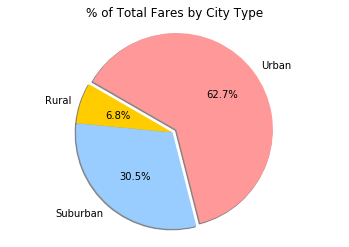

In [473]:
# Build Pie Chart for Fares
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-210, counterclock=False, radius = 2)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure for Total Fares by City Type
plt.savefig("PyberFaresPie.png")

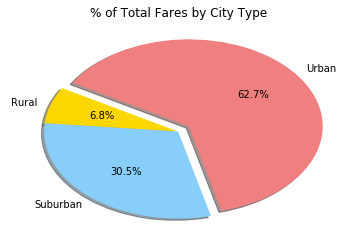

In [4]:
# Given Answer for Total Fares by City Type
plt.show()

## Total Rides by City Type

In [474]:
print(f"Total Number of Rides: {total_rides}, Urban Rides: {num_urban_rides}, Suburban Rides: {num_suburban_rides}, Rural Rides: {num_rural_rides}")

Total Number of Rides: 2375, Urban Rides: 1625, Suburban Rides: 625, Rural Rides: 125


In [475]:
# Calculate Ride Percents
urban_rides_pc = round(num_urban_rides / total_rides, 3)*100
suburban_rides_pc = round(num_suburban_rides / total_rides, 3)*100
rural_rides_pc = round(num_rural_rides / total_rides, 3)*100
print(f" Urban % = {urban_rides_pc}, Suburban % = {suburban_rides_pc}, Rural % = {rural_rides_pc}")

 Urban % = 68.4, Suburban % = 26.3, Rural % = 5.3


In [477]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
rides = [urban_rides_pc, suburban_rides_pc, rural_rides_pc]

# The colors of each section of the pie chart
colors = ['#ff9999', "#99CCFF", "#FFCC00"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

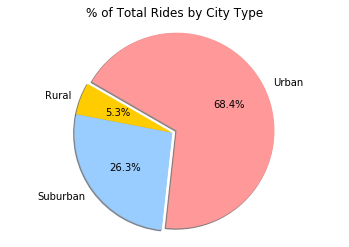

In [483]:
# Build Pie Chart
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-210, counterclock=False, radius = 2)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure for Total Rides by City Type
plt.savefig("PyberRidePie.png")

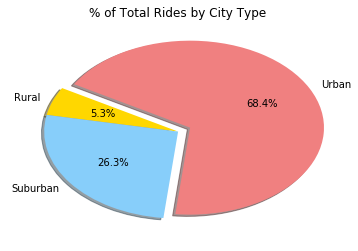

In [5]:
# Given Answer for Total Rides by City Type
plt.show()

## Total Drivers by City Type

In [479]:
# Calculate Drivers 
total_drivers

2973

In [480]:
# Calcuate Driver Percents
urban_driver_pc = round(num_urban_drivers / total_drivers, 3)
suburban_driver_pc = round(num_suburban_drivers / total_drivers, 3)
rural_driver_pc = round(num_rural_drivers / total_drivers, 3)
print(f"Urban %: {urban_driver_pc}, Suburban %: {suburban_driver_pc}, Rural %: {rural_driver_pc}.")

Urban %: 0.809, Suburban %: 0.165, Rural %: 0.026.


In [481]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
drivers = [urban_driver_pc, suburban_driver_pc, rural_driver_pc]

# The colors of each section of the pie chart
colors = ['#ff9999', "#99CCFF", "#FFCC00"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

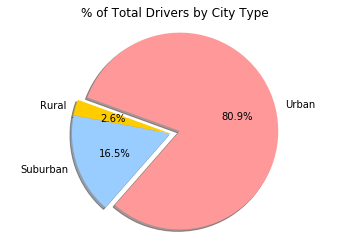

In [482]:
# Build Pie Chart
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-200, counterclock=False)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure for Total Drivers by City Type
plt.savefig("PyberDriverPie.png")

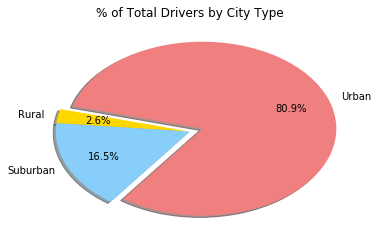

In [6]:
# Given Answer for Total Drivers by City Type
plt.show()